In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Math and Vectors
import pandas as pd
import numpy as np

#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#ML
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/generative-ai-tweets/GenerativeAI tweets.csv
/kaggle/input/2023-kaggle-ai-report/sample_submission.csv
/kaggle/input/2023-kaggle-ai-report/arxiv_metadata_20230510.json
/kaggle/input/2023-kaggle-ai-report/kaggle_writeups_20230510.csv


In [3]:
df = pd.read_csv('/kaggle/input/generative-ai-tweets/GenerativeAI tweets.csv', parse_dates=['Datetime'])

In [4]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2023-04-19 21:27:19+00:00,1648800467206672384,From Studio Gangster to Synthetic Gangster 🎤.....,resembleai
1,1,2023-04-19 21:27:09+00:00,1648800425540476929,Took me some time to find this. I build this #...,devaanparbhoo
2,2,2023-04-19 21:26:57+00:00,1648800376479715328,Mind blowing next wave #generativeai platform...,timreha
3,3,2023-04-19 21:26:49+00:00,1648800341193027584,Open Source Generative AI Image Specialist Sta...,VirtReview
4,4,2023-04-19 21:25:00+00:00,1648799883934203905,Are you an #HR leader considering which future...,FrozeElle


In [5]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56221 entries, 0 to 56220
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  56221 non-null  int64              
 1   Datetime    56221 non-null  datetime64[ns, UTC]
 2   Tweet Id    56221 non-null  int64              
 3   Text        56221 non-null  object             
 4   Username    56221 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 2.1+ MB


In [7]:
df.dtypes

Unnamed: 0                  int64
Datetime      datetime64[ns, UTC]
Tweet Id                    int64
Text                       object
Username                   object
dtype: object

In [8]:
df.nunique()

Unnamed: 0    56221
Datetime      55528
Tweet Id      56221
Text          55596
Username      14373
dtype: int64

In [9]:
df = df.rename(columns = str.lower)

In [10]:
df.head()

,unnamed: 0,datetime,tweet id,text,username
0,0,2023-04-19 21:27:19+00:00,1648800467206672384,From Studio Gangster to Synthetic Gangster 🎤.....,resembleai
1,1,2023-04-19 21:27:09+00:00,1648800425540476929,Took me some time to find this. I build this #...,devaanparbhoo
2,2,2023-04-19 21:26:57+00:00,1648800376479715328,Mind blowing next wave #generativeai platform...,timreha
3,3,2023-04-19 21:26:49+00:00,1648800341193027584,Open Source Generative AI Image Specialist Sta...,VirtReview
4,4,2023-04-19 21:25:00+00:00,1648799883934203905,Are you an #HR leader considering which future...,FrozeElle


In [11]:
#DailyCounts
dcounts = df.set_index("datetime").resample("D")["tweet id"].count()
dcounts

datetime
2022-04-21 00:00:00+00:00      2
2022-04-22 00:00:00+00:00      1
2022-04-23 00:00:00+00:00      1
2022-04-24 00:00:00+00:00      1
2022-04-25 00:00:00+00:00      7
                            ... 
2023-04-15 00:00:00+00:00    522
2023-04-16 00:00:00+00:00    531
2023-04-17 00:00:00+00:00    800
2023-04-18 00:00:00+00:00    885
2023-04-19 00:00:00+00:00    886
Freq: D, Name: tweet id, Length: 364, dtype: int64

In [12]:
#Longest daily count
print(max(dcounts))

1011


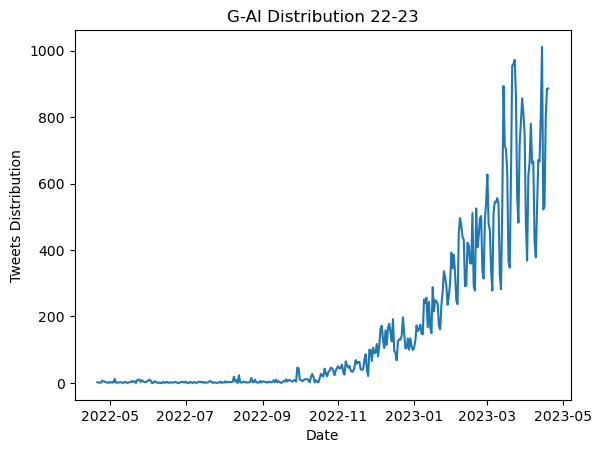

In [13]:
plt.plot(dcounts.index, dcounts.values)
plt.xlabel("Date")
plt.ylabel("Tweets Distribution")
plt.title("G-AI Distribution 22-23")
plt.show()

### The graph indicates a positive slope.

In [14]:
df["datetime"].groupby(df.datetime.dt.to_period("M")).agg("count")

datetime
2022-04       24
2022-05      105
2022-06       61
2022-07       55
2022-08      135
2022-09      219
2022-10      630
2022-11     1670
2022-12     3977
2023-01     6881
2023-02    11108
2023-03    19003
2023-04    12353
Freq: M, Name: datetime, dtype: int64

# دالة تحليل المشاعر

In [15]:
def infer_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Netural"

In [16]:
df["sentiment"] = df["text"].apply(infer_sentiment)

In [17]:
df["sentiment"].value_counts()

Positive    29199
Netural     21709
Negative     5313
Name: sentiment, dtype: int64

<Axes: ylabel='sentiment'>

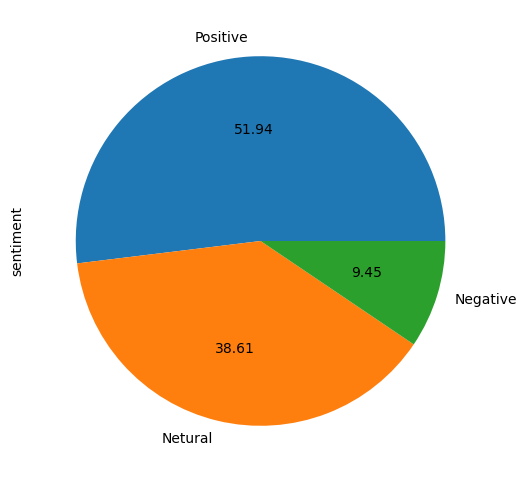

In [18]:
plt.figure(figsize = (13, 6))
df["sentiment"].value_counts().plot(kind='pie', autopct='%.2f')

## Tag Cloud Creator (TCC)

In [19]:
def infer_tcc(data, title = None):
    tcc = WordCloud(
        background_color = "white",
        max_words = 400,
        max_font_size = 25,
        scale = 3,
        random_state = 42
    ).generate(str(data))
    
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis("off")
    if title:
        fig.suptitle(title, figsize = 20)
        fig.subplots_adjust(top = 2.3)
    
    plt.imshow(tcc)
    plt.show()

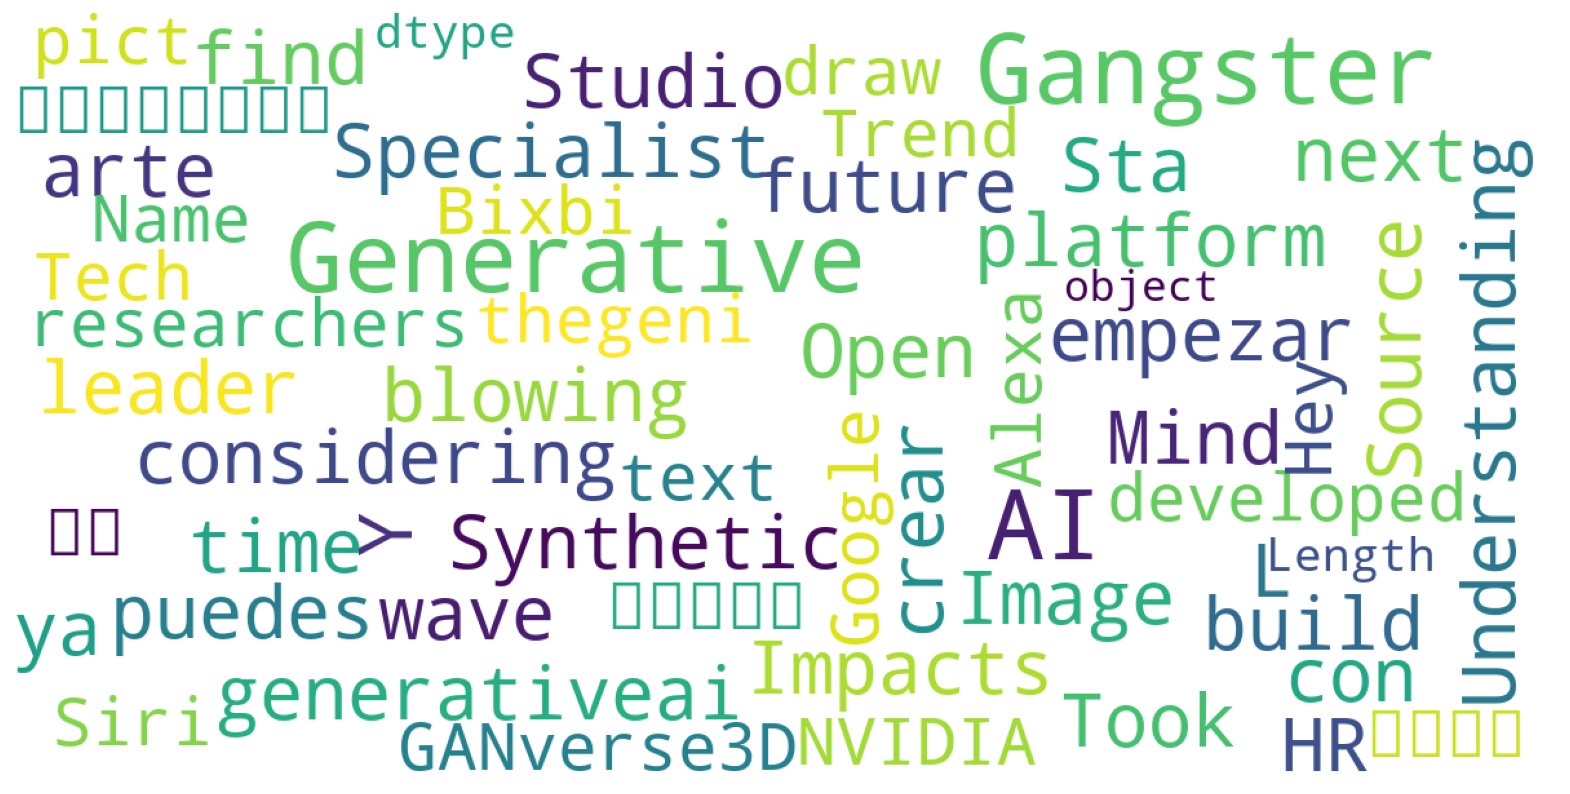

In [20]:
infer_tcc(df["text"])

In [21]:
output=pd.read_csv("/kaggle/input/2023-kaggle-ai-report/sample_submission.csv")
output.head()

,type,value
0,essay_category,'copy/paste the exact category that you are su...
1,essay_url,'http://www.kaggle.com/your_username/your_note...
2,feedback1_url,'http://www.kaggle.com/.../your_1st_peer_feedb...
3,feedback2_url,'http://www.kaggle.com/.../your_2nd_peer_feedb...
4,feedback3_url,'http://www.kaggle.com/.../your_3rd_peer_feedb...


In [22]:
output.loc[0]['value']='Generative AI'
output.loc[1]['value']='https://www.kaggle.com/code/sanjushasuresh/2023-kaggle-ai-report-generative-ai'
output.loc[2]['value']='https://www.kaggle.com/code/efraromiyanto/ai-ethics-navigating-the-complex-landscape-of-mac/comments#2283240'
output.loc[3]['value']='https://www.kaggle.com/code/raimondextervinluan/ai-ethics-why-is-it-hard-to-incorporate/comments#2283433'
output.loc[4]['value']='https://www.kaggle.com/code/pawanthapaliya/tabular-and-time-series-data/comments#2283506'

In [23]:
output.head()

,type,value
0,essay_category,Generative AI
1,essay_url,https://www.kaggle.com/code/sanjushasuresh/202...
2,feedback1_url,https://www.kaggle.com/code/efraromiyanto/ai-e...
3,feedback2_url,https://www.kaggle.com/code/raimondextervinlua...
4,feedback3_url,https://www.kaggle.com/code/pawanthapaliya/tab...


In [24]:
output.to_csv("output.csv", index = False)

## La Fin!